In [6]:
# from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import structural_similarity as compare_ssim
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(20,20)

In [33]:
imageA = cv2.imread('master222.jpgc1.jpg')
imageB = cv2.imread('sample222.jpgc1.jpg')

In [34]:
print(np.shape(imageA),np.shape(imageB))

(2825, 4369, 3) (2819, 4369, 3)


In [35]:
if np.shape(imageA)[1]>np.shape(imageB)[1]:
    imageA=imageA[:,:np.shape(imageB)[1]]
elif np.shape(imageA)[1]<np.shape(imageB)[1]:
    imageB=imageB[:,:np.shape(imageA)[1]]
if np.shape(imageA)[0]>np.shape(imageB)[0]:
    imageA=imageA[:np.shape(imageB)[0],:]
else:
    imageB=imageB[:np.shape(imageA)[0],:]

In [36]:
print(np.shape(imageA),np.shape(imageB))

(2819, 4369, 3) (2819, 4369, 3)


In [37]:
imageB=imageB[:np.shape(imageA)[0],:]

In [38]:
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

SSIM: 0.5353153151109723


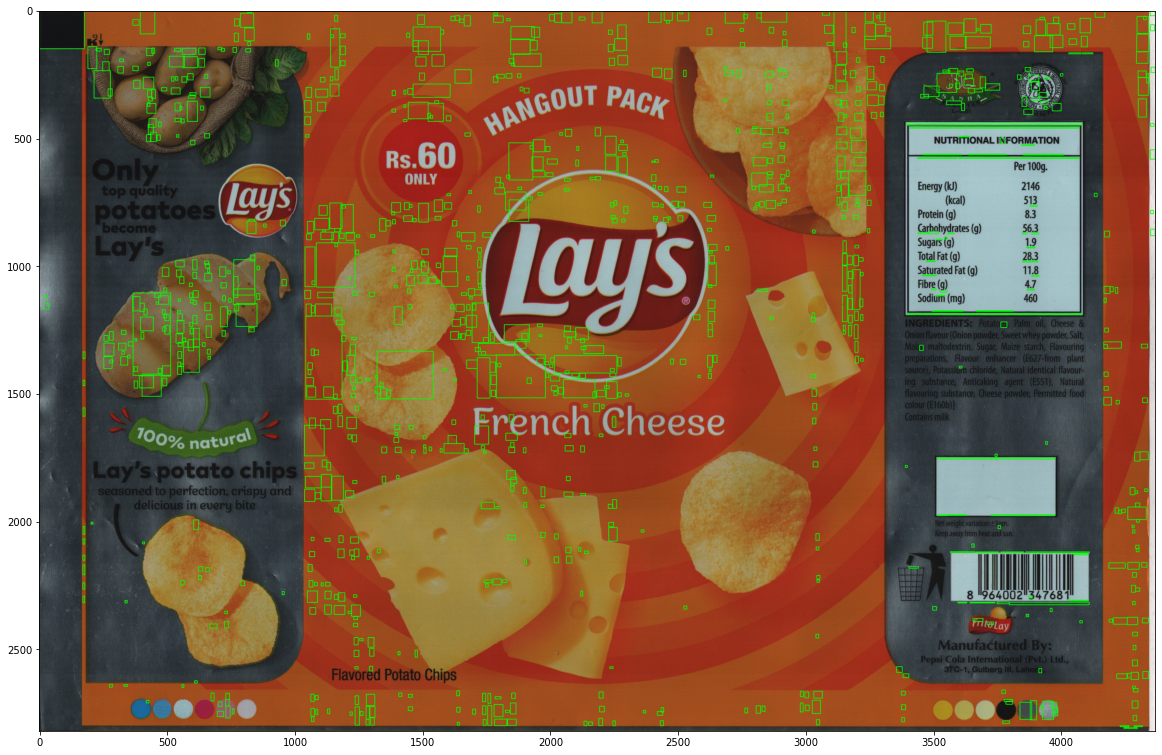

In [39]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
# thresh = cv2.threshold(diff, 127, 255,
#     cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh = cv2.threshold(diff, 40, 255,cv2.THRESH_BINARY_INV)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# cv2.drawContours(imageA, cnts, -1, (0,255,0), 1)
# loop over the contours
for c in cnts:
# #     # compute the bounding box of the contour and then draw the
# #     # bounding box on both input images to represent where the two
# #     # images differ
    area = cv2.contourArea(c)
    if area>40:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 255, 0), 2)
# cv2.drawContours(imageA, cnts, -1, (0, 255, 0), 1)
# cv2.drawContours(imageB, cnts, -1, (0, 255, 0), 1)
# show the output images
plt.imshow(imageA[:,:,::-1])

# cv2.waitKey(0)  

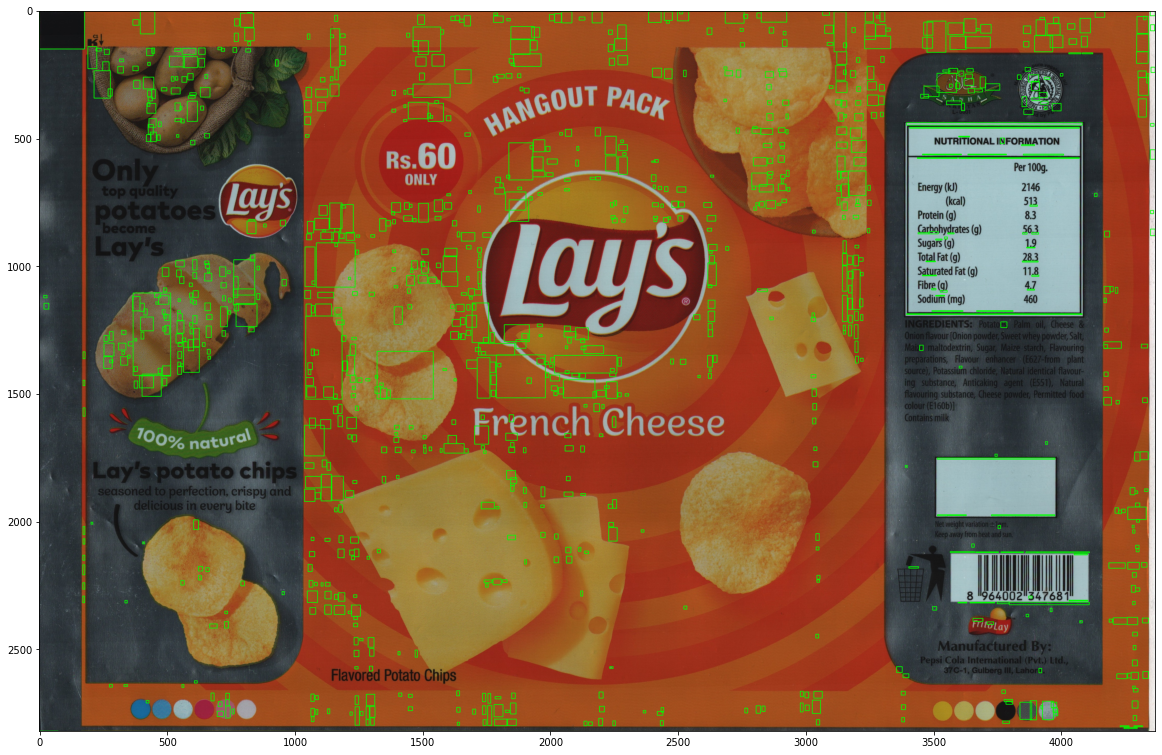

In [40]:
plt.imshow(imageB[:,:,::-1])

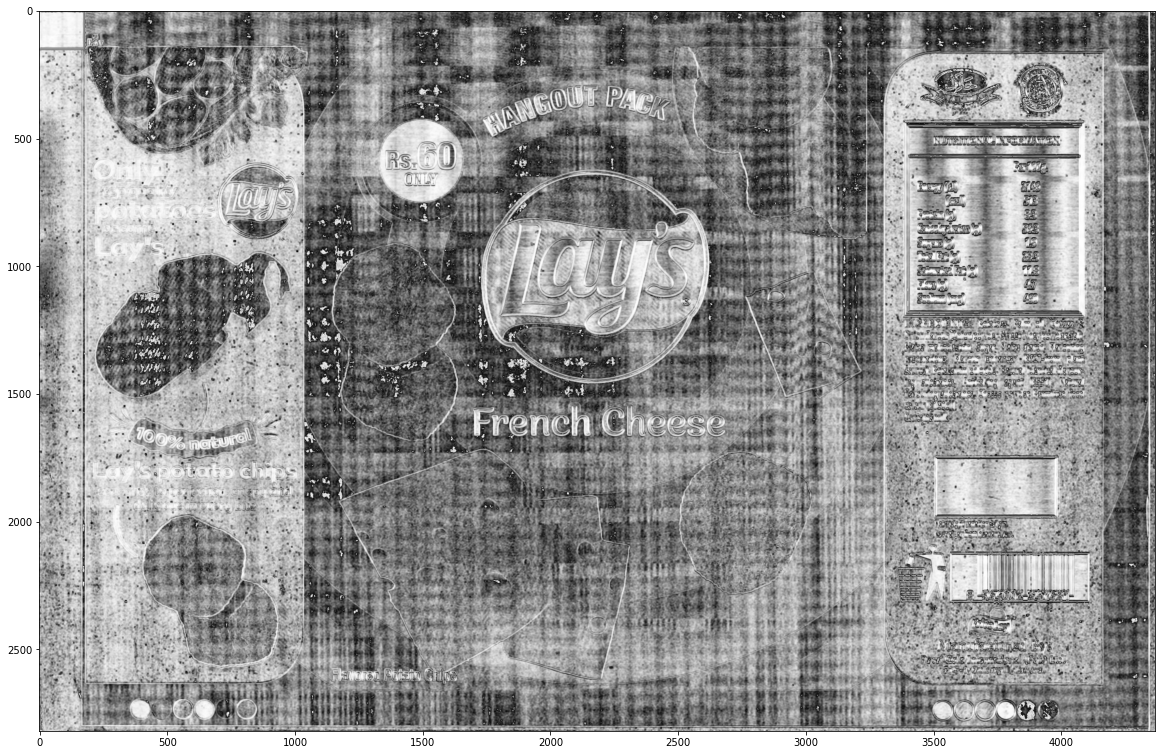

In [41]:
plt.imshow(diff,cmap='gray');

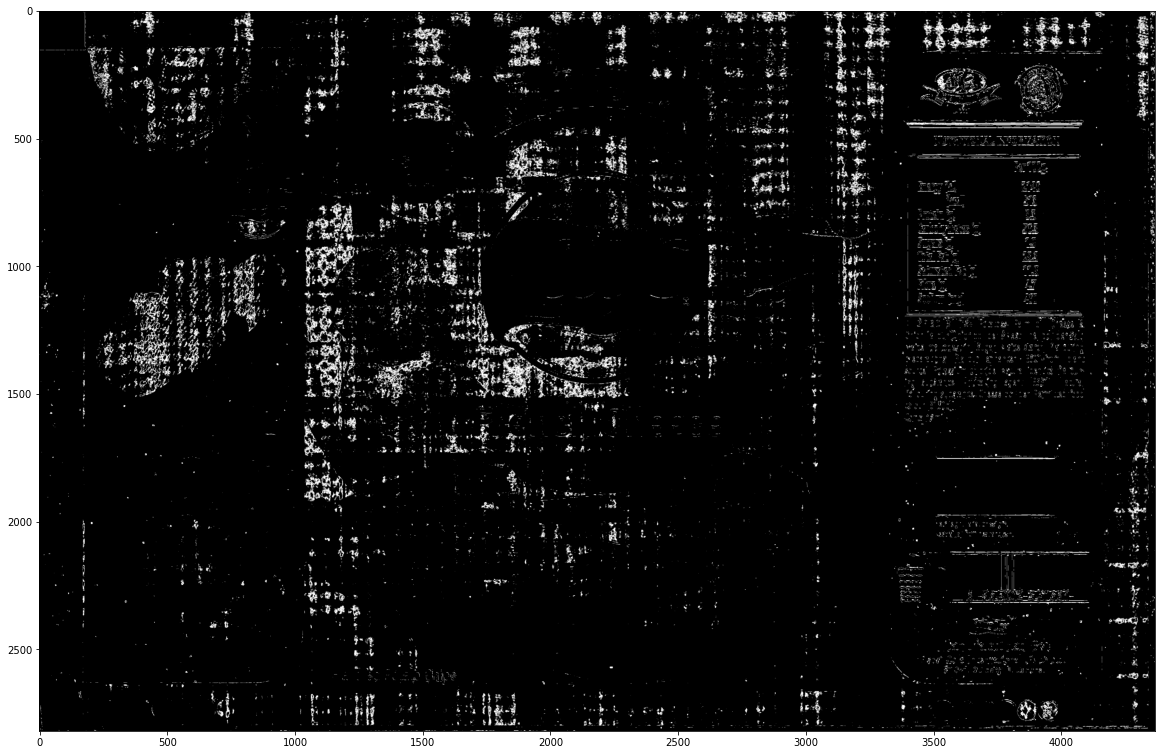

In [42]:
plt.imshow(thresh,cmap='gray');

# ORB

0.34909393876275774


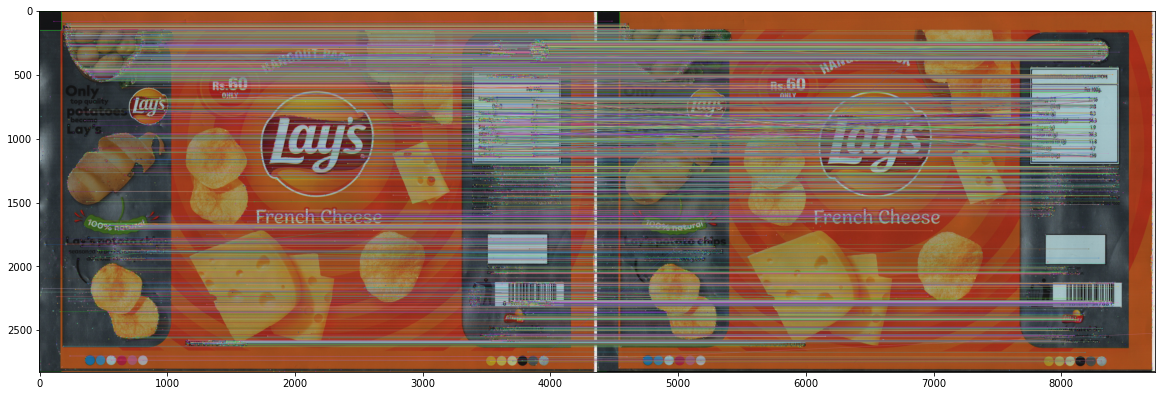

In [8]:
original = cv2.imread('master222.jpgc1.jpg')
image_to_compare = cv2.imread('sample222.jpgc1.jpg')


# 2) Check for similarities between the 2 images

sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)
good_points = []
ratio = 0.6
for m, n in matches:
    if m.distance < ratio*n.distance:
        good_points.append(m)
#         print(len(good_points))
print(len(good_points)/len(matches))
result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)
# cv2.imshow("result", result)
# cv2.imshow("Original", original)
# cv2.imshow("Duplicate", image_to_compare)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(result[:,:,::-1])

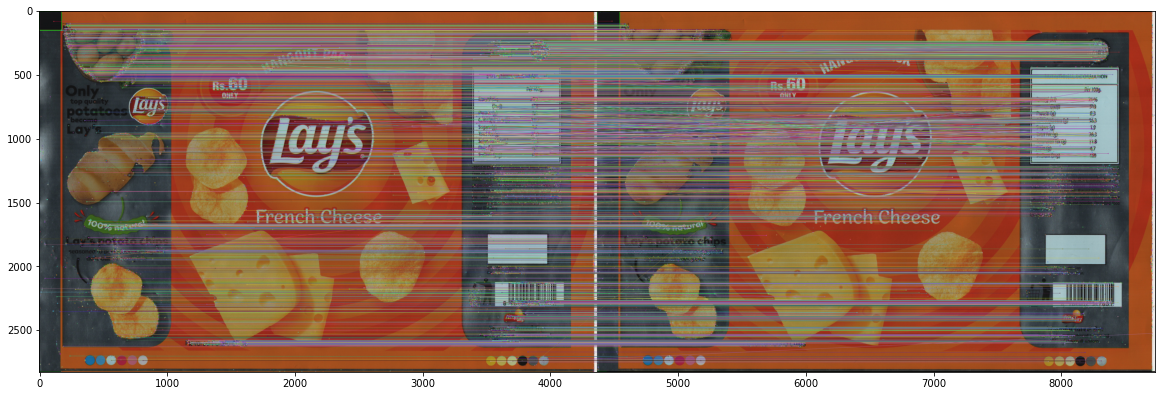

In [7]:
# plt.imshow(result[:,:,::-1])